In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras  
from keras import datasets
import warnings
 

In [8]:

fashion_mnist = datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

class_name = ['T-shirt/top' ,'Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# to check the total number of train and test images 

print(train_images.shape[0])
print(test_images.shape[0])


4423680/4422102 [==============================] - 35s 8us/step
60000
10000


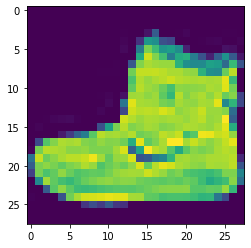

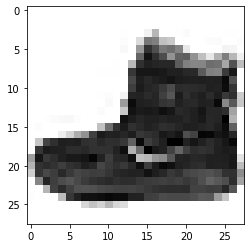

In [9]:
# to analyze a figure in coloured as well as gray formt 
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(train_images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.show()


In [10]:
# since it is a shape ditection we will convert the image into gray scale just to reduse the computational cost 

# scaling the values of the train images between 0 to 1 
train_images = train_images / 255.00
# scaling the values of the test images between 0 to 1 
test_images = test_images / 255.00



4


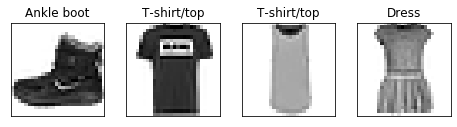

In [11]:
# display the first n images in the set  ( with respective lables )
plt.figure(figsize = (10 , 10))
n=int(input())
for i in range (n):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i]  , cmap = plt.cm.binary )
    plt.grid(False)
    plt.title(class_name[train_labels[i]])
plt.show()
    

In [12]:
# creating the model // here in the last layer the activation function softmax is  used to achieve multi class classification  

# the last layer contains 10 neurons which is equal to the total number of classes in our multiclass classification 

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 , 28 )),
    keras.layers.Dense(125 , activation = tf.nn.relu),
    keras.layers.Dense(10 , activation = tf.nn.softmax )
    
]
)

model.compile(optimizer= 'adam' , loss= 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
# for binary classification :
#model.compile(optimizer='rmsprop',loss='binary_crossentropy' ,metrics=['accuracy', mean_pred ]// For two class classifier 

model.fit(train_images , train_labels , epochs = 10 ) 

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4974 - acc: 0.8268
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3748 - acc: 0.8652
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3381 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3139 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2975 - acc: 0.8893
Epoch 6/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2829 - acc: 0.8953
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2698 - acc: 0.8994
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2578 - acc: 0.9035
Epoch 9/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2486 - acc: 0.9071
Epoc

In [16]:
# prediction of the image in test dataset 

prediction=model.predict(test_images)
s=int(input("enter the numbe of the image to be predicted "))
print(np.argmax(prediction[s]))
class_name[np.argmax(prediction[s])]

enter the numbe of the image to be predicted 5
1


'Trouser/pants'

92.03166666666667


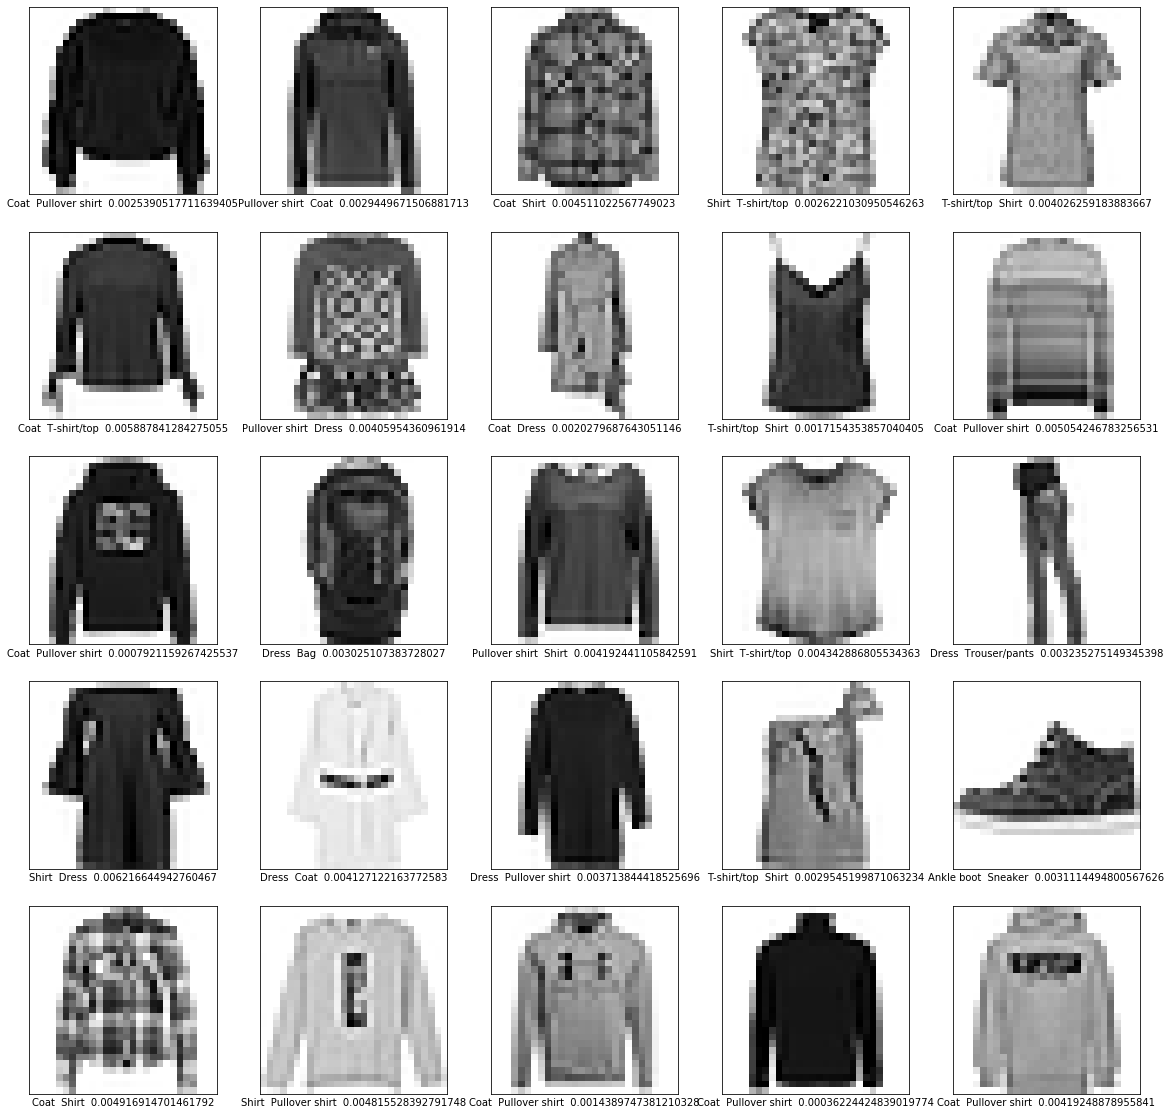

In [17]:
# to check the acc of the mode (without using the inbuild functions )


pred = model.predict(train_images)
a=0
error_array = [] 
for i in range(len(train_images)):
    if (np.argmax(pred[i])!=train_labels[i]):
        a = 1 - pred[i][np.argmax(pred[i])]
        error_array.append((class_name[np.argmax(pred[i])],class_name[train_labels[i]],a,i))

per_acc =( 1 - ( len(error_array) / len(train_images) ) )*100 
print(per_acc) 

plt.figure(figsize = (20 , 20))
k=0
for i in error_array :
    plt.subplot(5,5,k +1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i[3]]  , cmap = plt.cm.binary )
    plt.grid(False)
    plt.xlabel(class_name[np.argmax(pred[i[3]])] + "  " + class_name[train_labels[i[3]]] + "  " + str(i[2] /100))
    k=k+1
    if k == 25 :
        break
plt.show()
